In [16]:
from utils import load_imagenet_model, imagenet_datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import torchvision
import torch

imagenet_path = "/tmp/imagenet/"
checkpoint_path = "/mnt/home/svenditto/ceph/imagenet-simclr/noise015"

_, dataset_test = imagenet_datasets(imagenet_path)
model = load_imagenet_model(checkpoint_path)

In [3]:
model.hparams

"layer_dim":    96
"lr":           0.06
"max_epochs":   100
"momentum":     0.9
"noise_std":    0.15
"weight_decay": 0.0005

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5952941..2.3088455].


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

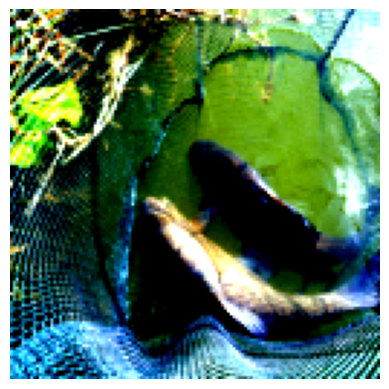

In [21]:
img = dataset_test[0][0]
plt.imshow(img.permute(1,2,0))
plt.axis('off')

In [39]:
cropped_imgs = []
activations = []
crop_size = 32
step_size = 5
n_crops=12
n_draws=100
model.eval()
with torch.no_grad():
    for i in range(0,n_crops*step_size,step_size):
        ci = img[:,:crop_size,i:i+crop_size]
        cropped_imgs.append(ci)
        ci = ci.to(model.device)
        for i in range(n_draws):
            activations.append(model.backbone(ci).squeeze())
# cropped_imgs = torch.stack(cropped_imgs)
activations = torch.stack(activations)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.229281..2.0434172].


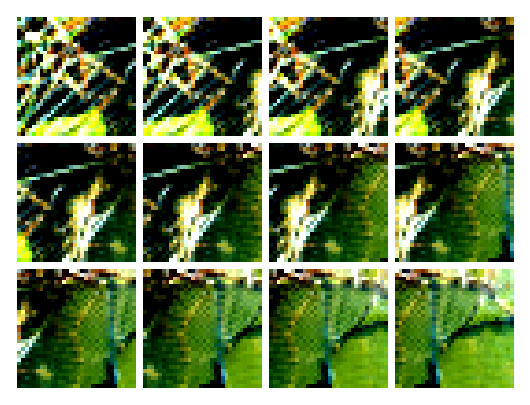

In [40]:
img_grid = torchvision.utils.make_grid(cropped_imgs,nrow=4,pad_value=1).permute(1,2,0)
plt.figure(figsize=(10,5))
plt.imshow(img_grid)
plt.axis('off')
plt.show()
plt.close()

# fig,axs = plt.subplots(2, 5, figsize=(10,5),sharex=True,sharey=True)
# for i,(im, ax) in enumerate(zip(cropped_imgs, axs.flatten())):
#     ax.imshow(im.permute(1,2,0))
#     ax.set_title(i)
#     ax.axis('off')

/tmp/ipykernel_2617451/3763022278.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(proj[i:i+n_draws,0],proj[i:i+n_draws,1],label=str(int(i/n_draws)),c=colors[n])


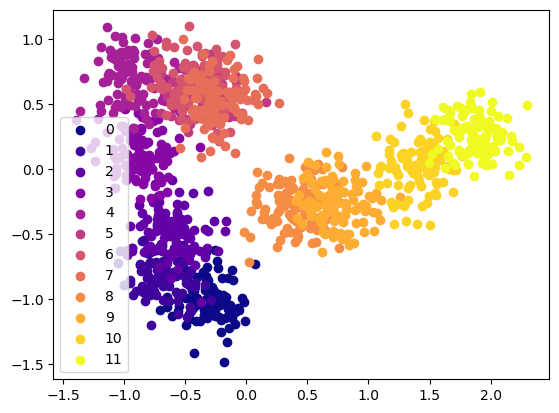

In [41]:
pcs = PCA(n_components=2).fit(activations.cpu())
proj = pcs.transform(activations.cpu())
cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0,1,n_crops))
for n,i in enumerate(range(0,n_draws*n_crops,n_draws)):
    plt.scatter(proj[i:i+n_draws,0],proj[i:i+n_draws,1],label=str(int(i/n_draws)),c=colors[n])
    plt.legend()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5952941..2.3088455].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.229281..2.0434172].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.141793..2.0434172].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.141793..1.9908963].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.141793..1.8858544].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.141793..1.8033988].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.1247058..1.

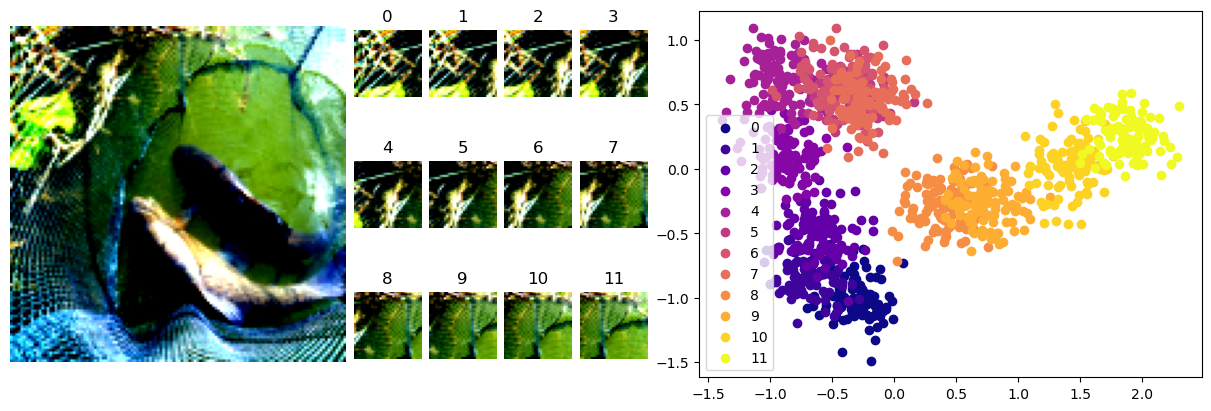

In [48]:
axs = plt.figure(layout="constrained", figsize=(12,4)).subplot_mosaic(
    """
    ABCDEN
    AFGHIN
    AJKLMN
    """,
    width_ratios=[1,0.2,0.2,0.2,0.2,1.5]
)
axs['A'].imshow(img.permute(1,2,0))
axs['A'].axis('off')
for i,a in enumerate(['B','C','D','E','F','G','H','I','J','K','L','M']):
    axs[a].imshow(cropped_imgs[i].permute(1,2,0))
    axs[a].axis('off')
    axs[a].set_title(str(i))
cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0,1,n_crops))
for n,i in enumerate(range(0,n_draws*n_crops,n_draws)):
    axs['N'].scatter(proj[i:i+n_draws,0],proj[i:i+n_draws,1],label=str(int(i/n_draws)),c=colors[n])
    axs['N'].legend()